In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spiral-playgorund/spiral.csv
/kaggle/input/olivetti-faces-augmented-dataset/augmented_labels.npy
/kaggle/input/olivetti-faces-augmented-dataset/augmented_faces.npy


## Zadanie klasyfikacja Spiral Playground
Twoim zadaniem jest klasyfikacja za pomocą algorytmu k-najbliższych sąsiadów (KNN) na zbiorze danych spiral. Zbiór danych zawiera dwie skupiska punktów, które układają się w formę spirali. Twoim celem jest znalezienie odpowiedniej liczby klastrów, aby poprawnie zgrupować te punkty.

Zbiór danych "spiral" zawiera współrzędne (x1, x2) punktów na płaszczyźnie. Liczba klas jest znana, dlatego będziesz musiał(a) wypróbować różne wartości parametru k (liczby sąsiadów) i dokonać oceny, która liczba klastrów najlepiej oddziela spirale.

Kroki do wykonania zadania:

1. Załaduj zbiór danych "spiral".
2. Wizualizuj dane na płaszczyźnie, aby zobaczyć, jak spiralne punkty są rozmieszczone.
4. Dodaj algorytm k-najbliższych sąsiadów (KNN).
Wybierz różne wartości k i użyj algorytmu KNN do przypisania punktów do klastrów.

5. Wybierz optymalną liczbę sąsiadów $k$, która najlepiej oddziela spirale.
Ponownie wizualizuj dane, pokazując przyporządkowanie punktów do klastrów.
Wskazówki:

Warto sprawdzić różne wartości parametru k (liczby sąsiadów) np. k=2, k=3, k=4, itd.


In [3]:
import pandas as pd 

df = pd.read_csv('/kaggle/input/spiral-playgorund/spiral.csv', index_col=0)
df.head()

,X1,X2,y
0,0.118647,-0.181079,0
1,0.022316,-0.088976,0
2,0.181717,0.072110,0
3,0.256028,-0.042128,0
4,0.250036,0.012372,0


In [6]:
df.tail()

,X1,X2,y
995,-1.484234,1.592692,1
996,-1.352414,1.300645,1
997,-1.399816,1.347010,1
998,-1.308200,1.361328,1
999,-1.366256,1.333302,1


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/3127994700.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


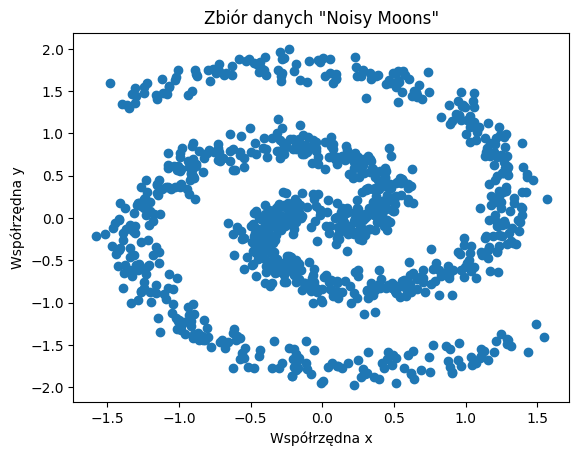

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X = df[['X1', 'X2']].to_numpy()

# Wizualizacja danych
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
plt.title('Zbiór danych "Noisy Moons"')
plt.xlabel('Współrzędna x')
plt.ylabel('Współrzędna y')
plt.show()

### 

In [17]:
X.shape

(1000, 2)

In [30]:
#todo klasyfikacja
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
y_pred = knn.fit(X, y).predict(X)


#todo odpalenie kodu poniżej: 

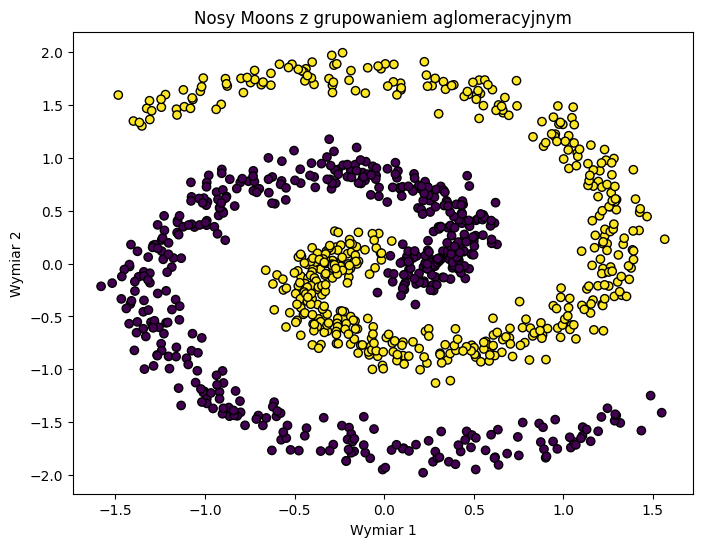

In [31]:
# Wizualizacja wyników grupowania
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', edgecolors='k')
plt.title('Nosy Moons z grupowaniem aglomeracyjnym')
plt.xlabel('Wymiar 1')
plt.ylabel('Wymiar 2')
plt.show()


**Zadanie: Oczyszczanie i Rekonstrukcja Obrazów za pomocą Autoenkodera**

**Cel zadania:**
Twoim zadaniem jest trenowanie autoenkodera w celu oczyszczenia i rekonstrukcji zaburzonych obrazów twarzy. Wykorzystasz zbiór danych zawierający obrazy twarzy oraz ich odpowiednie zaburzone wersje.

**Opis zadania:**

1. **Wczytanie danych:** Dostępne są dwie tablice NumPy: `data` zawierająca obrazy twarzy oraz `targets` zawierająca etykiety.

2. **Podział danych:** Podziel dane na zbiór treningowy i testowy, wykorzystując dostępne narzędzia takie jak `train_test_split`.

3. **Dodanie szumu:** Wygeneruj zaburzone wersje obrazów treningowych i testowych, dodając szum. W przykładzie użyto `x_train_noisy` i `x_test_noisy`.

4. **Model autoenkodera:** Zbuduj model autoenkodera w oparciu o Keras. Model powinien zawierać warstwy konwolucyjne do oczyszczania obrazów. Zadaniem modelu jest przewidzenie oryginalnych, niezaburzonych obrazów na podstawie ich zaburzonych wersji.

5. **Trening modelu:** Trenuj autoenkoder na danych treningowych (`x_train_noisy`) w celu nauczenia go oczyszczania obrazów. Skorzystaj z odpowiednich hiperparametrów, takich jak liczba epok, rozmiar batcha itp.

6. **Ewaluacja modelu:** Po treningu, oceniaj model na danych testowych (`x_test_noisy`) i oblicz jakość oczyszczania obrazów.

7. **Wizualizacja wyników:** Wykorzystaj model do rekonstrukcji obrazów i wyświetlenia oryginalnych i oczyszczonych wersji w celu oceny jakości modelu.

**Uwagi:**

- Ewaluacja modelu będzie polegać na porównaniu rekonstruowanych obrazów z ich oryginalnymi wersjami.
- Możesz dostosować kod i eksperymentować z architekturą autoenkodera oraz parametrami modelu, takimi jak funkcja straty i optymalizator, aby uzyskać najlepsze wyniki.
- Możesz także rozważyć inne techniki poprawy jakości obrazów, takie jak zastosowanie sieci generatywnych.

To zadanie koncentruje się na uczeniu maszynowym w kontekście przetwarzania obrazów, w szczególności na oczyszczaniu i rekonstrukcji obrazów za pomocą autoenkodera.

In [32]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

import numpy as np

data = np.load('/kaggle/input/olivetti-faces-augmented-dataset/augmented_faces.npy')
targets = np.load('/kaggle/input/olivetti-faces-augmented-dataset/augmented_labels.npy')

# Podziel dane na zbiór treningowy i testowy
test_size = 0.2  # Procent danych, który zostanie wykorzystany jako zbiór testowy
random_state = 42  # Ziarno losowości dla powtarzalności wyników
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=test_size, random_state=random_state)

noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)



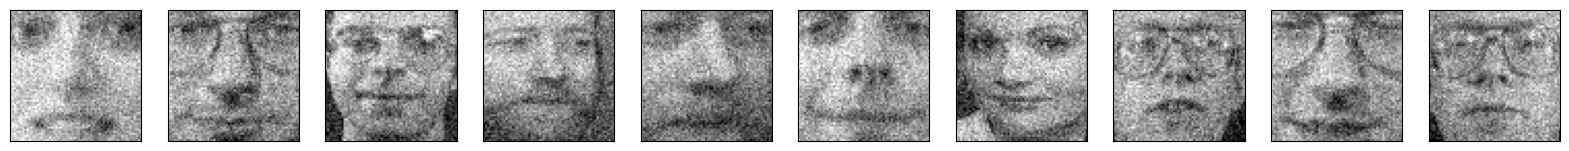

In [33]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [40]:
#todo autoencoder model denoise
from keras.layers import Conv2D, MaxPooling2D, Conv2D, UpSampling2D
from keras import Input, Model

input_img = Input(shape=(64, 64, 1))

x = Conv2D(64, (5, 5), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (5, 5), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,epochs=100,batch_size=128,shuffle=True,validation_data=(x_test_noisy, x_test))



Epoch 1/100
13/13 [==============================] - 5s 123ms/step - loss: 0.6787 - val_loss: 0.6688
Epoch 2/100
13/13 [==============================] - 1s 68ms/step - loss: 0.6560 - val_loss: 0.6455
Epoch 3/100
13/13 [==============================] - 1s 68ms/step - loss: 0.6432 - val_loss: 0.6398
Epoch 4/100
13/13 [==============================] - 1s 68ms/step - loss: 0.6381 - val_loss: 0.6368
Epoch 5/100
13/13 [==============================] - 1s 68ms/step - loss: 0.6353 - val_loss: 0.6368
Epoch 6/100
13/13 [==============================] - 1s 68ms/step - loss: 0.6344 - val_loss: 0.6339
Epoch 7/100
13/13 [==============================] - 1s 68ms/step - loss: 0.6327 - val_loss: 0.6327
Epoch 8/100
13/13 [==============================] - 1s 68ms/step - loss: 0.6322 - val_loss: 0.6322
Epoch 9/100
13/13 [==============================] - 1s 68ms/step - loss: 0.6313 - val_loss: 0.6314
Epoch 10/100
13/13 [==============================] - 1s 69ms/step - loss: 0.6311 - val_loss: 0.631

13/13 [==============================] - 0s 8ms/step


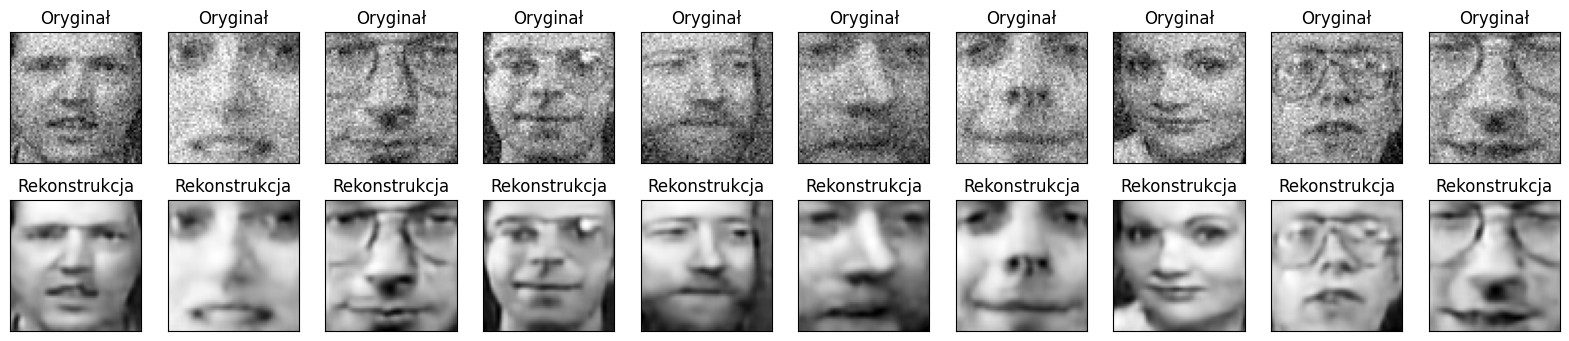

In [41]:
import matplotlib.pyplot as plt

# Odtworzenie obrazów z zestawu testowego
decoded_images = autoencoder.predict(x_test_noisy)

# Wybór kilku przykładów do wizualizacji
n = 10  # Wybierz liczbę przykładów do wyświetlenia
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obraz oryginalny
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(64, 64))
    plt.title("Oryginał")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Rekonstrukcja
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(64, 64))
    plt.title("Rekonstrukcja")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


**Zadanie: Generacja Dolnych Części Twarzy z wykorzystaniem Sieci Neuronowej**

**Cel zadania:**
Twoim zadaniem jest trenowanie i ocena modelu sieci neuronowej w celu generacji dolnych części twarzy. Wykorzystasz dane zawierające obrazy twarzy oraz ich dolne części i nauczyć model, aby przewidywał dolne fragmenty twarzy na podstawie górnych fragmentów.

**Opis zadania:**

1. **Wczytanie danych:** Dostępne są dwie tablice NumPy: `data` zawierająca obrazy twarzy oraz `targets` zawierająca etykiety odpowiadające dolnym fragmentom twarzy.

2. **Przygotowanie danych treningowych i testowych:** Wyodrębnij dane treningowe (górna część twarzy) oraz dane testowe (dolna część twarzy). Aby zwiększyć zróżnicowanie danych, wybierz tylko określoną liczbę twarzy z danych testowych.

3. **Model sieci neuronowej:** Zbuduj model sieci neuronowej w oparciu o Keras. Model powinien przyjąć górną część twarzy jako dane wejściowe i przewidywać dolną część twarzy jako dane wyjściowe. Model powinien zawierać co najmniej jedną warstwę ukrytą i wykorzystywać odpowiednie funkcje aktywacji (np. ReLU) oraz funkcję straty (mean squared error), aby zminimalizować błąd predykcji.

4. **Trening modelu:** Trenuj model na danych treningowych z odpowiednimi hiperparametrami (np. liczba epok, rozmiar batcha). Przy użyciu opcji `validation_split`, przeprowadź walidację na części danych treningowych, aby monitorować postęp modelu.

5. **Ewaluacja modelu:** Po zakończeniu treningu, oceniaj model na danych testowych (górna część twarzy) i oblicz błąd na danych, na których model nie był uczony.

6. **Wizualizacja wyników:** Wykorzystaj model do przewidzenia dolnych części twarzy dla danych testowych. Wyświetl oryginalne dolne części twarzy i odpowiadające im przewidywane dolne części w celu oceny jakości modelu.

**Uwagi:**

- Możesz eksperymentować z architekturą modelu, liczbą warstw, neuronów i innymi hiperparametrami, aby uzyskać najlepsze wyniki.
- Model zostanie wytrenowany na danych, które zawierają dolne części twarzy, ale będzie próbował przewidzieć je na podstawie górnych części twarzy.
- Ewaluacja modelu będzie polegać na porównaniu przewidywanych dolnych części twarzy z rzeczywistymi dolnymi częściami twarzy. Warto stosować miary ewaluacji, takie jak błąd średniokwadratowy (mean squared error).
- Możesz dostosować kod do własnych potrzeb, a także rozważyć dodanie warstw regularizacji i innych technik usprawniających trening modelu.

In [83]:
data = np.load('/kaggle/input/olivetti-faces-augmented-dataset/augmented_faces.npy').reshape(-1, 64*64)
targets = np.load('/kaggle/input/olivetti-faces-augmented-dataset/augmented_labels.npy')

In [84]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from keras.models import Sequential
from keras.layers import Dense, Conv1D

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]


In [66]:
X_train.max()

0.9890498040704175

In [49]:
y_test.shape

(5, 2048)

In [89]:
#todo model
from keras.optimizers import Adam


model=Sequential()
model.add(Dense(256, activation='relu', input_dim=2048))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))

model.add(Dense(2048, activation='linear'))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mse'])
model.fit(X_train,y_train,validation_split=0.2, epochs=50, batch_size=128)

predicted_lower_faces=model.predict(X_test)

Epoch 1/50
10/10 [==============================] - 1s 24ms/step - loss: 0.2172 - mse: 0.2172 - val_loss: 0.0836 - val_mse: 0.0836
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0519 - mse: 0.0519 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 6/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 7/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 8/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0187 - mse

In [76]:
predicted_lower_faces.shape

(5, 2048)

1/1 [==============================] - 0s 20ms/step


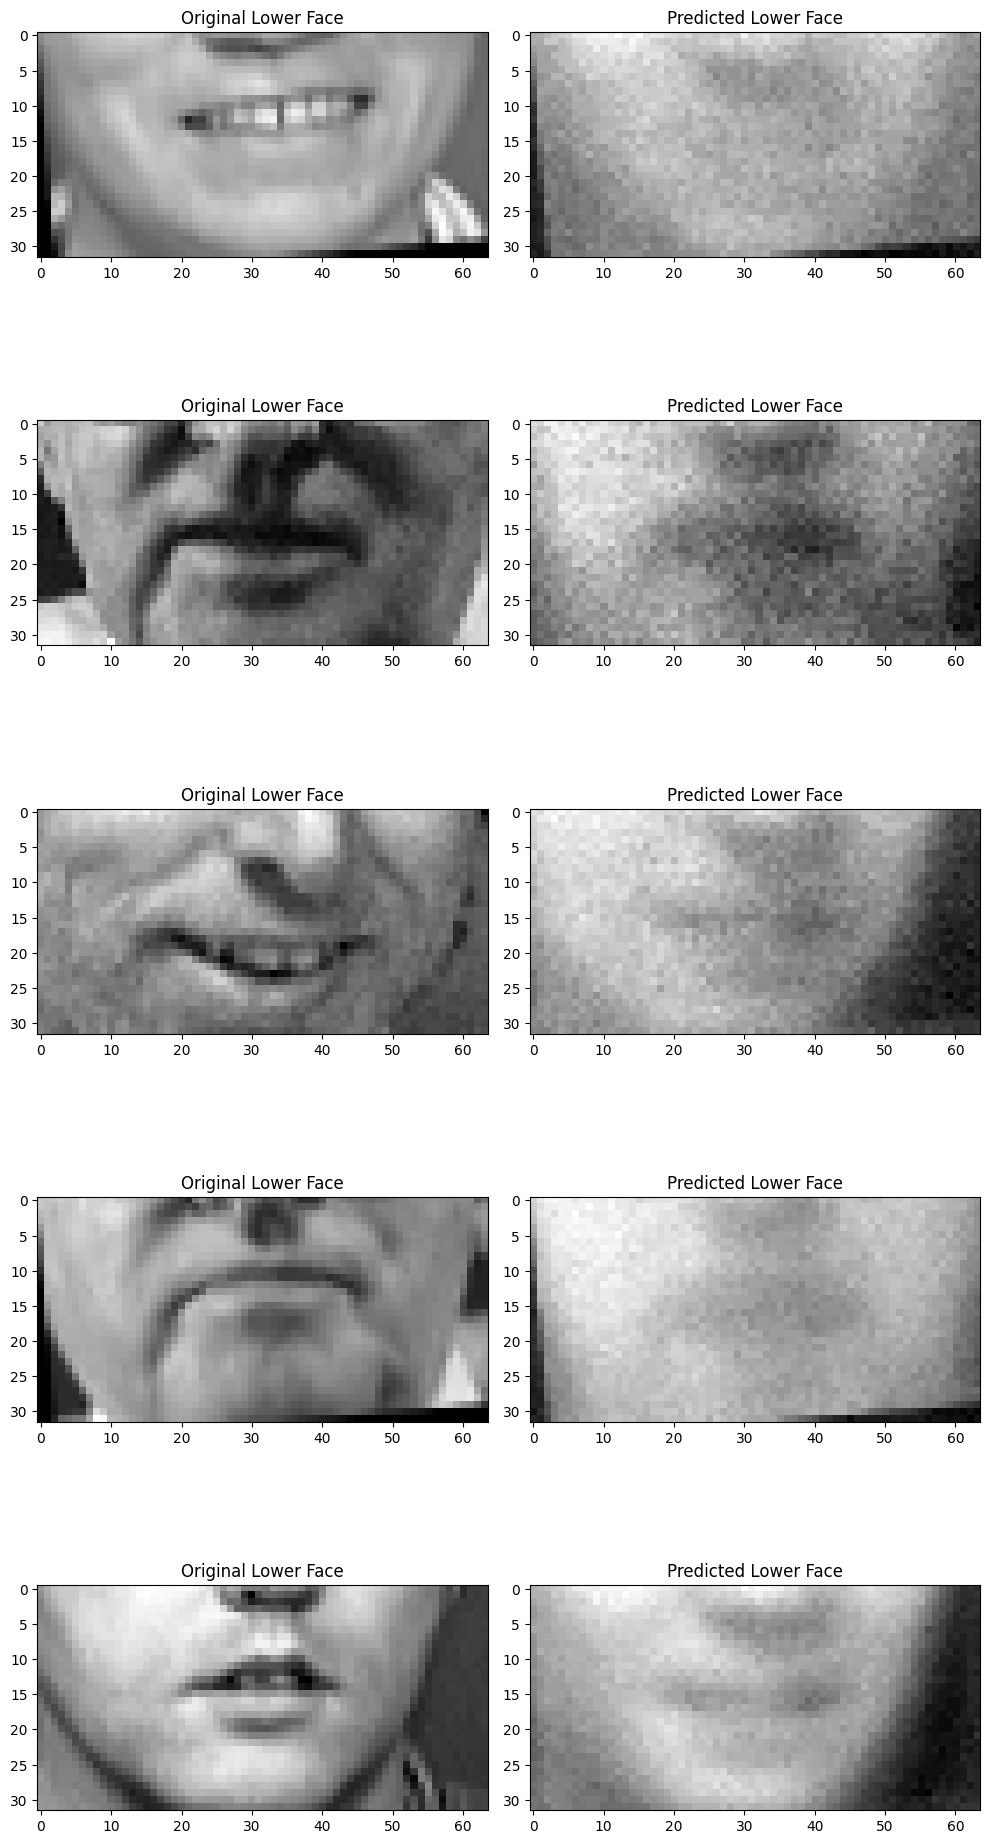

In [90]:
import numpy as np
import matplotlib.pyplot as plt


# Predict using the trained model
predicted_lower_faces = model.predict(X_test)

# Display original and predicted lower faces
n_display = min(n_faces, 5)  # Number of faces to display
plt.figure(figsize=(10, 4 * n_display))

for i in range(n_display):
    plt.subplot(n_display, 2, 2 * i + 1)
    original_face = y_test[i].reshape(32, -1)  # Reshape to match the original image width
    plt.imshow(original_face, cmap='gray')
    plt.title("Original Lower Face")

    plt.subplot(n_display, 2, 2 * i + 2)
    predicted_face = predicted_lower_faces[i].reshape(32, -1)  # Reshape to match the original image width
    plt.imshow(predicted_face, cmap='gray')
    plt.title("Predicted Lower Face")

plt.tight_layout()
plt.show()
